# Sploosh: onomatopoeia of a mass falling into liquid




## Definition of the model

### Imports and definitions

In [1]:
import os
import sys
import math
sys.path.insert(1, "../..")
import numpy as np
import matplotlib.pyplot as plt

import spatialpy

### Model

In [2]:
class Walls(spatialpy.Geometry):
    def __init__(self, bx_lim, by_lim, lx_lim, ly_lim, rx_lim, ry_lim):
        self.bx_lim = bx_lim
        self.by_lim = by_lim
        self.lx_lim = lx_lim
        self.ly_lim = ly_lim
        self.rx_lim = rx_lim
        self.ry_lim = ry_lim
        
    def inside(self, point, on_boundary):
        if point[0] >= self.bx_lim[0] and point[0] < self.bx_lim[1] and point[1] == self.by_lim:
            return True
        if point[0] == self.lx_lim and point[1] >= self.ly_lim[0] and point[1] < self.ly_lim[1]:
            return True
        if point[0] == self.rx_lim and point[1] >= self.ry_lim[0] and point[1] < self.ry_lim[1]:
            return True
        return False

In [3]:
class Water(spatialpy.Geometry):
    def __init__(self, x_lim, y_lim):
        self.x_lim = x_lim
        self.y_lim = y_lim

    def inside(self, point, on_boundary):
        if point[0] >= self.x_lim[0] and point[0] < self.x_lim[1] and \
                point[1] >= self.y_lim[0] and point[1] < self.y_lim[1]:
            return True
        return False

In [4]:
class Rock(spatialpy.Geometry):
    def __init__(self, x_lim, y_lim):
        self.x_lim = x_lim
        self.y_lim = y_lim
        
    def inside(self, point, on_boundary):
        if point[0] >= self.x_lim[0] and point[0] < self.x_lim[1] and \
                point[1] >= self.y_lim[0] and point[1] < self.y_lim[1]:
            return True
        return False

In [5]:
class Sploosh(spatialpy.Model):
    WALLS = Walls.__name__
    WATER = Water.__name__
    ROCK  = Rock.__name__

    def __init__(self, model_name="Sploosh"):
        spatialpy.Model.__init__(self, model_name)
        
        # Domain       
        xmax=1
        ymax=1
        delta_wall  = 0.01
        delta_water = 0.05
        delta_rock  = 0.01
        # Constants
        wall_mass=0.0000001
        wall_nu=1.0
        wall_vol=1.0
        water_mass=0.0000001
        water_nu=1.0
        water_vol=1.0
        rock_size=0.1
        rock_mass=10
        rock_nu=10
        rock_vol=1.0
        ############### start with and empty Domain
        domain = spatialpy.Domain(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0), gravity=[0,-1,0])
        #domain = spatialpy.Domain(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0))
        domain.dimensions = 2
        ############### add Walls
        walls = Walls((0, xmax + delta_wall), 0, 0, (delta_wall, ymax), xmax, (delta_wall, ymax))
        domain.fill_with_particles(
            walls, delta_wall, type_id=self.WALLS, mass=wall_mass, vol=wall_vol, nu=wall_nu, fixed=True
        )
        ############### add Water
        wx_lim = (2 * delta_water, xmax - delta_water)
        wy_lim = (2 * delta_water, ymax / 2)
        water = Water(wx_lim, wy_lim)
        domain.fill_with_particles(
            water, delta_water, xmin=wx_lim[0], xmax=wx_lim[1], ymin=wy_lim[0], ymax=wy_lim[1],
            type_id=self.WATER, mass=water_mass, vol=water_vol, nu=water_nu, fixed=False
        )
        ############### add a "Rock"
        rx_lim = ((xmax/2)-(rock_size/2), (xmax/2)+(rock_size/2))
        ry_lim = ((ymax-rock_size), ymax)
        rock = Rock(rx_lim, ry_lim)
        domain.fill_with_particles(
            rock, delta_rock, xmin=rx_lim[0], xmax=rx_lim[1], ymin=ry_lim[0], ymax=ry_lim[1],
            type_id=self.ROCK, mass=rock_mass, vol=1.0, nu=rock_nu, fixed=False
        )

        self.add_domain(domain)
        
        # Static Domain
        self.staticDomain = False
        
        # Timespan
        dt = 1e-8
        nt = 10
        self.timespan(np.linspace(0, dt*nt, 5), timestep_size=dt)
       

In [6]:
model = Sploosh()
# model.domain

In [7]:
model.domain.P0 = 0.000

In [8]:
model.domain

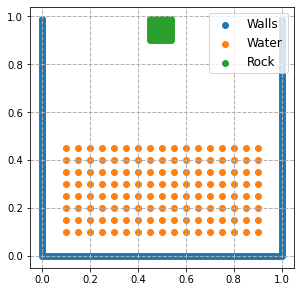

In [9]:
model.domain.plot_types(use_matplotlib=True)

In [10]:
solver = spatialpy.Solver(model=model, debug_level=0)
%time solver.compile()
solver.build_dir

CPU times: user 9.31 ms, sys: 4.29 ms, total: 13.6 ms
Wall time: 443 ms


'/var/folders/z4/bqpnd_kx7xg3s3c9jtz0pnfh0000gn/T/spatialpy_build_i1_4hgze'

In [11]:
%time results = solver.run()

CPU times: user 531 µs, sys: 3.85 ms, total: 4.38 ms
Wall time: 194 ms


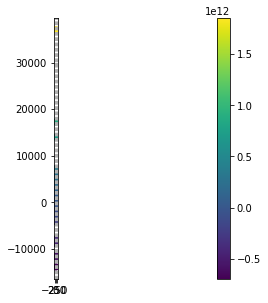

In [12]:
results.plot_property("v", p_ndx=1, t_ndx=-1, use_matplotlib=True)

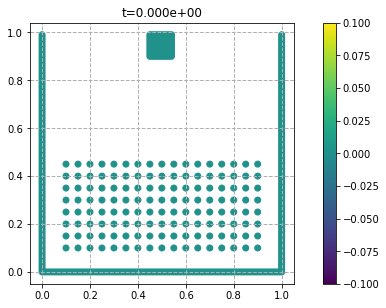

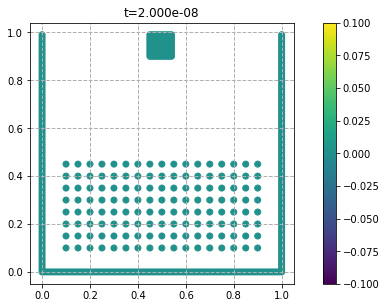

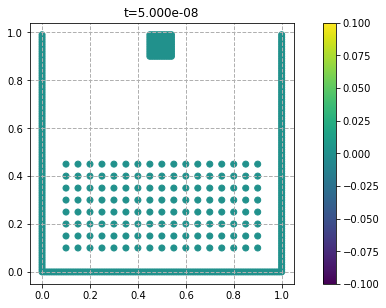

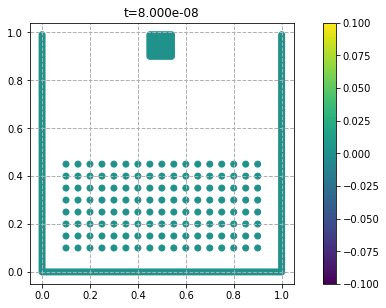

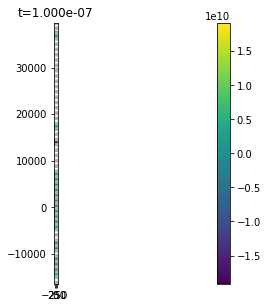

In [13]:
for n,t in enumerate(results.get_timespan()):
    results.plot_property("v",t_ndx=n,use_matplotlib=True)
    plt.title(f"t={t:.3e}")

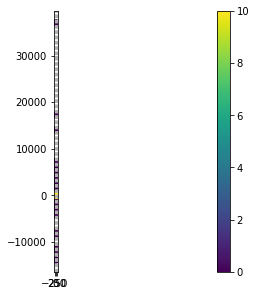

In [14]:
results.plot_property("mass", p_ndx=1, t_ndx=-1, use_matplotlib=True)

In [15]:
#results.plot_property("v", p_ndx=1, t_ndx=-1, use_matplotlib=False)

In [16]:
#results.plot_property("type", use_matplotlib=True)